Adaptive Gradient Boosting.
1. Boosting refers to ensemble method that can combine several weak learners into a strong learner. The predictors are trained sequentially, each trying to correct its predecessor.

2. Adaboost : One of the way for a new predictor to correct its predecessor is to pay a bit more attention to the training instance that the predecessor underfits.

3. Training adaboost classifier- The algorithm first trains a base classifier on training data. Then it makes predictions on the training data using this classifier. The algo then increases the relative weight of misclassified instance. Then it trains a second classifier using the updates weights and again makes prediction on training set...This is reapeated for x no of iterations

Algo -
1. Calculate the starting weight to be assigned to all instances(n=no. of instances)
w = np.ones(n)/n
if n = 10
w = [.1,.1,.1,.1,.1,.1,.1,.1,.1,.1]


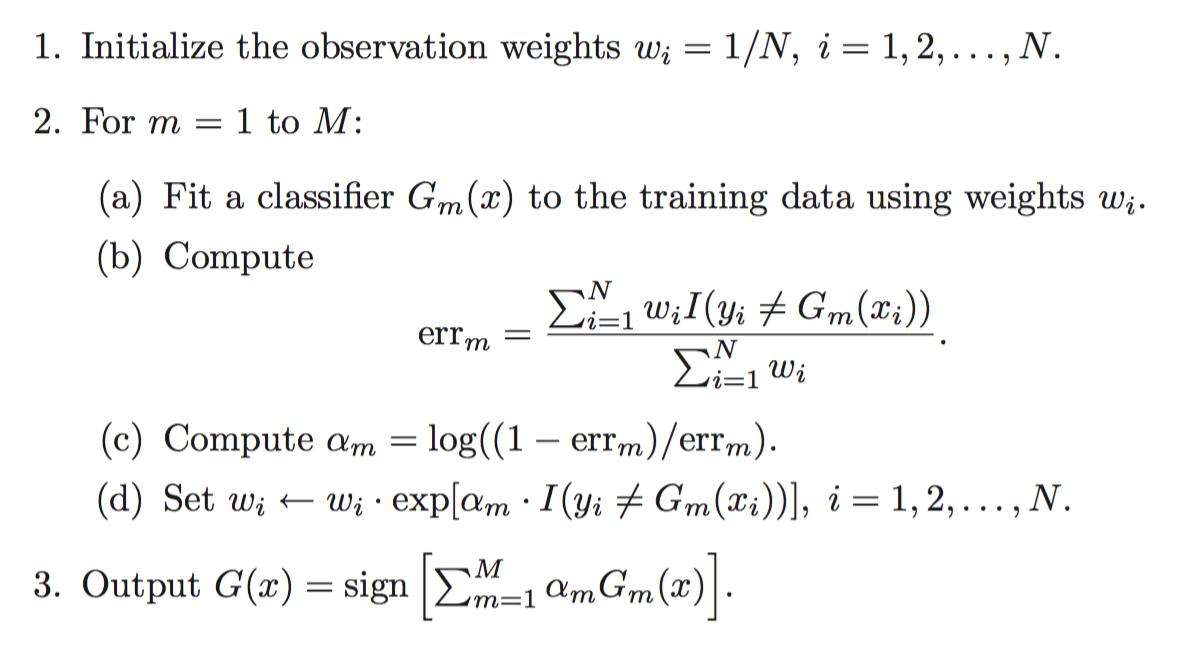

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_hastie_10_2
from matplotlib import pyplot as plt

In [33]:
def print_error_rate(err):
    print('Error rate: Training: %.4f - Test: %.4f' % err)

In [26]:
def get_error_rate(pred, Y):
  return sum(pred != Y) / float(len(Y))

In [28]:
def generic_clf(x_train,y_train,x_test,y_test, clf):
  clf.fit(x_train, y_train)
  pred_train = clf.predict(x_train)
  pred_test = clf.predict(x_test)
  return get_error_rate(pred_train,y_train), get_error_rate(pred_test,y_test)

In [34]:
def plot_error_rate(er_train, er_test):
    df_error = pd.DataFrame([er_train, er_test]).T
    df_error.columns = ['Training', 'Test']
    plot1 = df_error.plot(linewidth = 3, figsize = (8,6),
            color = ['lightblue', 'darkblue'], grid = True)
    plot1.set_xlabel('Number of iterations', fontsize = 12)
    plot1.set_xticklabels(range(0,450,50))
    plot1.set_ylabel('Error rate', fontsize = 12)
    plot1.set_title('Error rate vs number of iterations', fontsize = 16)
    plt.axhline(y=er_test[0], linewidth=1, color = 'red', ls = 'dashed')

In [38]:
def adaboost_clf(x_train, y_train, x_test, y_test, M, clf):
  n_train, n_test = len(x_train), len(x_test)
  w = np.ones(n_train) / n_train
  pred_train, pred_test = np.zeros(n_train), np.zeros(n_test)
  for i in range(M):
    # fit the classifier to training and test data using the weights
    clf.fit(x_train, y_train, sample_weight = w)
    # preditction of classes at ith iteration
    pred_train_i = clf.predict(x_train)
    pred_test_i = clf.predict(x_test)

    # 1: prediction wrong , 0 : prediction correct
    # instances where the prediction went wrong
    miss = [int(x) for x in (pred_train_i != y_train)]

    # 1: prediction wrong , -1: prediction correct
    miss2 = [x if x == 1 else -1 for x in miss ]

    # error at iteration i
    err_m = np.dot(w, miss) / sum(w)

    # compute alpha
    alpha_m = 0.5  * np.log((1-err_m)/err_m)

    # update weights
    w = np.multiply(w, np.exp([float(x)*alpha_m for x in miss2]))

    # update pred_train
    pred_train = [sum(x) for x in zip(pred_train, [x*alpha_m for x in pred_train_i])]

    # update pred_test
    pred_test = [sum(x) for x in zip(pred_test, [x*alpha_m for x in miss2])]

  pred_train, pred_test = np.sign(pred_train), np.sign(pred_test)
  return get_error_rate(pred_train, y_train), get_error_rate(pred_test,y_test)


<ipython-input-34-bb1dd2847b10>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot1.set_xticklabels(range(0,450,50))


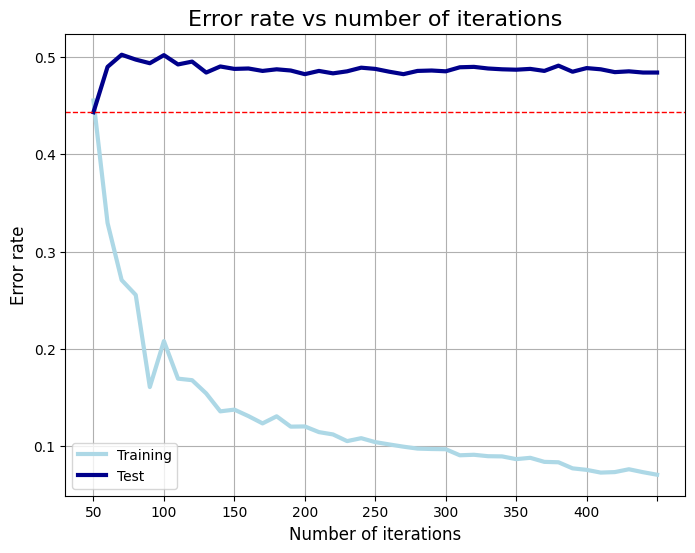

In [39]:
# Read data
x, y = make_hastie_10_2()
df = pd.DataFrame(x)
df['Y'] = y

# Split into training and test set
train, test = train_test_split(df, test_size = 0.2)
x_train, y_train = train.iloc[:,:-1], train.iloc[:,-1]
x_test, y_test = test.iloc[:,:-1], test.iloc[:,-1]

# Fit a simple decision tree first
clf_tree = DecisionTreeClassifier(max_depth = 1, random_state = 1)
er_tree = generic_clf(x_train, y_train, x_test, y_test, clf_tree)

# Fit Adaboost classifier using a decision tree as base estimator
# Test with different number of iterations
er_train, er_test = [er_tree[0]], [er_tree[1]]
x_range = range(10, 410, 10)
for i in x_range:
    er_i = adaboost_clf(x_train, y_train, x_test, y_test, i, clf_tree)
    er_train.append(er_i[0])
    er_test.append(er_i[1])

# Compare error rate vs number of iterations
plot_error_rate(er_train, er_test)